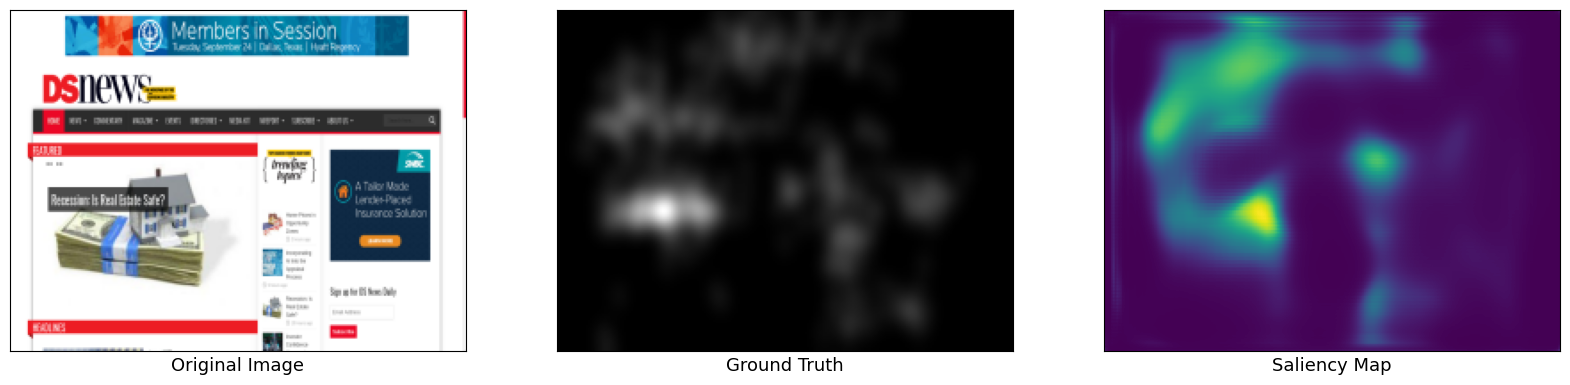

In [45]:
from paths import *
from models import Generator
import torch
from utils import *
import matplotlib.pyplot as plt
import urllib
import numpy as np
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
g50 = Generator()
g100 = Generator()
g75 = Generator()
g50.load_state_dict(torch.load('during_training/generator_ep231.pkl'))
# print(g)
g50 = g50.to(device)


def saliency_from_val(model,name):
    img = cv2.imread(resizedImagesVal + name)
    imgc = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ground = cv2.imread(resizedMapsVal + name)
    smap = predict_plot(model, img, device).squeeze(0).numpy()
    
    fig = plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Original Image',fontsize=13)
    plt.imshow(imgc)
    
    plt.subplot(1,3,2)
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Ground Truth',fontsize=13)
    plt.imshow(ground)
    
    plt.subplot(1,3,3)
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_ticks([])
    plt.xlabel('Saliency Map',fontsize=13)
    plt.imshow(smap)

ex3 = 'dsnews.com.png'
saliency_from_val(g50,ex3)

In [46]:
import os
import cv2
import numpy as np
import torch

from paths import resizedImagesVal  # or define "data/images/val" directly
from models import Generator
from utils import predict_plot  # your function returning a torch Tensor
# from ...
# (Remove matplotlib imports, since we won't plot anything.)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load your generator model
g50 = Generator()
g50.load_state_dict(torch.load('during_training/generator_ep231.pkl'))
g50 = g50.to(device)
g50.eval()  # put in eval mode if you're not training

def save_saliency_for_all_val_images(model):
    # Folder containing your validation images (PNG/JPG).
    # If your code references "resizedImagesVal" from paths.py, adapt accordingly.
    val_folder = resizedImagesVal  # e.g. "data/images/val/"
    
    # Output folder for predictions:
    out_folder = "predictions_ep231"
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)

    # Iterate over all image files in the validation folder
    for filename in os.listdir(val_folder):
        # Skip non-image files if any
        if not (filename.lower().endswith(".png") or filename.lower().endswith(".jpg")):
            continue

        # Full path to the input image
        img_path = os.path.join(val_folder, filename)
        img = cv2.imread(img_path)

        # Predict saliency map
        # predict_plot(...) presumably returns a torch Tensor with shape [1, H, W]
        # or [H, W]. Adjust as needed.
        smap_tensor = predict_plot(model, img, device)  # shape [1,H,W]?
        smap = smap_tensor.squeeze(0).cpu().numpy()  # -> shape [H, W], float

        # Resize saliency map to 1280 wide x 720 tall
        # Note: cv2.resize uses (width, height)
        smap_resized = cv2.resize(smap, (1280, 720))

        # Convert [0,1] float to [0,255] uint8 if needed
        # (If already in [0,255], skip this.)
        smap_resized_uint8 = (smap_resized * 255).astype(np.uint8)

        # Save to the output folder
        out_path = os.path.join(out_folder, filename)
        cv2.imwrite(out_path, smap_resized_uint8)
    
    print("Saliency predictions saved to:", out_folder)


if __name__ == "__main__":
    save_saliency_for_all_val_images(g50)


Saliency predictions saved to: predictions_ep231
